In [ ]:
import pandas as pd
#open source data analysis and manipulation tool
import nltk
# Natural Language Toolkit
import seaborn as sns 
#Library for diagrams
from textblob import TextBlob
#Library for processing textual data
import re as regex
import re
nltk.download('punkt')  
# Natural Language Toolkit
from collections import Counter
# sklearn library for train-test,accuracy-recall-precision score and time
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
# time library for calculate time
from time import time
#precision, recall and and accuracy score from sklearn.metrics libraty  
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
#Read .csv files into train and test data with the right encoding!
train_data = pd.read_csv('/content/SocialMedia_Negative.csv', encoding= 'unicode_escape')
test_data = pd.read_csv('/content/SocialMedia_Positive.csv', encoding= 'unicode_escape')







In [25]:
# Analyze the 1st 5 posts of train_data file
train_data.head() 

,ID,Text,Sentiment
0,N1,I've had an IPhone for like 3 years and I've n...,negative
1,N2,I dont need the new iphone but I want it :(,negative
2,N3,fuck the iPhone 6s cus I'm not getting one :(,negative
3,N4,Hopefully will be able to get my iPhone 6s tod...,negative
4,N5,@clydesdalebank I've just bought a new iPhone ...,negative


In [26]:
# Info for the train_data file
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         501 non-null    object
 1   Text       501 non-null    object
 2   Sentiment  501 non-null    object
dtypes: object(3)
memory usage: 11.9+ KB


In [27]:
# Analyze the 1st 5 posts of test_data file
test_data.head()

,ID,Text,Sentiment
0,P1,Who is ready for iPhone 6s and iPhone 6s Plus?...,positive
1,P2,@lucy_larkman there are hacks on how to save h...,positive
2,P3,Hi Rica Cunanan : ricacunanan09 Do u want to g...,positive
3,P4,Hi Ariane Valentine : mainlyboredom Do u want ...,positive
4,P5,Hi eastside_crazii : rthompson672 Do u want to...,positive


In [28]:
# Info for the test_data file
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         501 non-null    object
 1   Text       501 non-null    object
 2   Sentiment  501 non-null    object
dtypes: object(3)
memory usage: 11.9+ KB


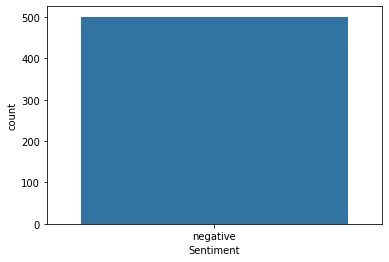

In [29]:
# Diagram of the train_data file with number of posts and negantive files
sns.countplot(x='Sentiment',data=train_data)

In [30]:
# remove tweets with empty sentiment column

train_data = train_data[train_data['Sentiment'] != ""]



In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         501 non-null    object
 1   Text       501 non-null    object
 2   Sentiment  501 non-null    object
dtypes: object(3)
memory usage: 15.7+ KB


In [32]:


 #Function to clean tweets
 #Remove URLs
 #Remove usernames (mentions)
 #Remove special characters EXCEPT FROM :,)
 #Remove Numbers 



def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)

     # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    
    
    
    
    return tweet



In [33]:
# Apply function to Text column with clean text
train_data['Text'] = train_data['Text'].apply(clean_tweets)


In [34]:
#Analyze the 1st 5 posts of train_data file after cleaning with Name of column and datatype!
train_data['Text'].head()

0    Ive had an IPhone for like  years and Ive neve...
1            I dont need the new iphone but I want it 
2            fuck the iPhone s cus Im not getting one 
3    Hopefully will be able to get my iPhone s toda...
4    Ive just bought a new iPhone and I cant use Ap...
Name: Text, dtype: object

In [35]:
# Function which directly tokenize the text data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
train_data['Text'].apply(tt.tokenize)

0      [Ive, had, an, IPhone, for, like, years, and, ...
1      [I, dont, need, the, new, iphone, but, I, want...
2      [fuck, the, iPhone, s, cus, Im, not, getting, ...
3      [Hopefully, will, be, able, to, get, my, iPhon...
4      [Ive, just, bought, a, new, iPhone, and, I, ca...
                             ...                        
496    [Does, anyone, have, an, extra, iPhone, case, ...
497    [I, think, its, the, first, iPhone, that, I, d...
498    [HomeOfTechUS, been, using, an, iPhone, with, ...
499                          [I, need, the, new, iPhone]
500    [yeah, I, was, getting, loads, of, pop, up, ad...
Name: Text, Length: 501, dtype: object

In [36]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [37]:
def tokenize(text):
    return word_tokenize(text)

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words

In [38]:
# apply tokenize function
train_data['text'] = train_data['Text'].apply(tokenize)

In [39]:
# apply steming function
train_data['tokenized'] = train_data['text'].apply(stemming)

In [40]:
train_data.head()

,ID,Text,Sentiment,text,tokenized
0,N1,Ive had an IPhone for like years and Ive neve...,negative,"[Ive, had, an, IPhone, for, like, years, and, ...","[ive, had, an, iphon, for, like, year, and, iv..."
1,N2,I dont need the new iphone but I want it,negative,"[I, dont, need, the, new, iphone, but, I, want...","[I, dont, need, the, new, iphon, but, I, want,..."
2,N3,fuck the iPhone s cus Im not getting one,negative,"[fuck, the, iPhone, s, cus, Im, not, getting, ...","[fuck, the, iphon, s, cu, Im, not, get, one]"
3,N4,Hopefully will be able to get my iPhone s toda...,negative,"[Hopefully, will, be, able, to, get, my, iPhon...","[hope, will, be, abl, to, get, my, iphon, s, t..."
4,N5,Ive just bought a new iPhone and I cant use Ap...,negative,"[Ive, just, bought, a, new, iPhone, and, I, ca...","[ive, just, bought, a, new, iphon, and, I, can..."


In [41]:
words = Counter()
for idx in train_data.index:
    words.update(train_data.loc[idx, "text"])

words.most_common(5)

[('iPhone', 352), ('I', 245), ('the', 245), ('my', 186), ('to', 165)]

In [42]:
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
whitelist = ["n't", "not"]
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]
words.most_common(5)

[('iPhone', 352), ('I', 245), ('iphone', 103), ('new', 84), ('want', 78)]

In [44]:
def word_list(processed_data):
    #print(processed_data)
    min_occurrences=3 
    max_occurences=500 
    stopwords=nltk.corpus.stopwords.words("english")
    whitelist = ["n't","not"]
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
    
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "text"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlist.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    #print(wordlist)

In [45]:
word_list(train_data)

In [46]:
words = pd.read_csv("wordlist.csv")

In [47]:
import os

In [48]:
wordlist= []
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in train_data.index:
    current_row = []
    
    # add label
    current_label = train_data.loc[idx, "Sentiment"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(train_data.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)


bow = data_model

In [49]:
import random
seed = 777
random.seed(seed)

In [50]:
def test_classifier(X_train, y_train, X_test, y_test, classifier):
    log("")
    log("---------------------------------------------------------")
    log("Testing " + str(type(classifier).__name__))
    now = time()
    list_of_labels = sorted(list(set(y_train)))
    model = classifier.fit(X_train, y_train)
    log("Learing time {0}s".format(time() - now))
    now = time()
    predictions = model.predict(X_test)
    log("Predicting time {0}s".format(time() - now))

    # Calculate Accuracy, Precision, recall
    
    precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    
    log("=================== Results ===================")
    log("            Negative     Neutral     Positive")
    log("F1       " + str(f1))
    log("Precision" + str(precision))
    log("Recall   " + str(recall))
    log("Accuracy " + str(accuracy))
    log("===============================================")

    return precision, recall, accuracy, f1

def log(x):
    #can be used to write to log file
    print(x)

In [51]:

from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(bow.iloc[:, 1:], bow['label'], test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, BernoulliNB())


---------------------------------------------------------
Testing BernoulliNB
Learing time 0.006237506866455078s
Predicting time 0.002290010452270508s
=================== Results ===================
            Negative     Neutral     Positive
F1       [1.]
Precision[1.]
Recall   [1.]
Accuracy 1.0


In [52]:
def cv(classifier, X_train, y_train):
    log("===============================================")
    classifier_name = str(type(classifier).__name__)
    now = time()
    log("Crossvalidating " + classifier_name + "...")
    accuracy = [cross_val_score(classifier, X_train, y_train, cv=8, n_jobs=-1)]
    log("Crosvalidation completed in {0}s".format(time() - now))
    log("Accuracy: " + str(accuracy[0]))
    log("Average accuracy: " + str(np.array(accuracy[0]).mean()))
    log("===============================================")
    return accuracy

In [53]:
# Give text input for testing your post!
# After clean tweet and print it!

y= input("Type your post for analysis:")
x=clean_tweets(y)
print(x)



Type your post for analysis:ohh fuck it :(
ohh fuck it 


In [54]:
# Using textblob library for data analysis 
# After sentiment and polarity for calculate the emotion of the post and print it for testing!
text= TextBlob(y)


z = text.sentiment.polarity

print (z)





-0.575


In [55]:
# Using if statement for printing if it is positive or negative!

if z==0: 
    print("Neutral")
elif z<0:
    print("Negative")
else:
    print("Positive")

Negative
